https://colah.github.io/posts/2014-10-Visualizing-MNIST/#raw_mnist

# Data Visualization using PCA

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [10]:

df=pd.read_csv('train.csv')
df.shape


(42000, 785)

In [8]:
labels=df.label 
data_matrix=df.drop(columns='label',axis=1) #drop class label
data_matrix.shape
labels

0        1
1        0
2        1
3        4
4        0
5        0
6        7
7        3
8        5
9        3
10       8
11       9
12       1
13       3
14       3
15       1
16       2
17       0
18       7
19       5
20       8
21       6
22       2
23       0
24       2
25       3
26       6
27       9
28       9
29       7
        ..
41970    2
41971    3
41972    4
41973    4
41974    3
41975    9
41976    2
41977    4
41978    4
41979    4
41980    7
41981    2
41982    8
41983    7
41984    3
41985    3
41986    0
41987    5
41988    0
41989    5
41990    3
41991    1
41992    9
41993    6
41994    4
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

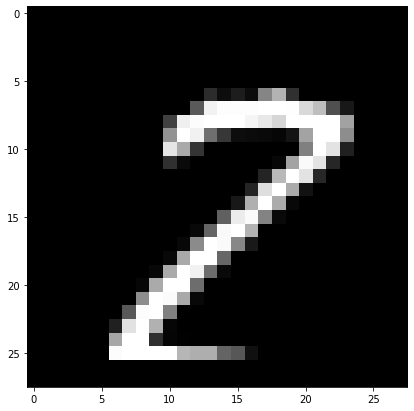

2


In [13]:
#display a digit from 42k datapoints
plt.figure(figsize=(7,7))
idx=644
grid_data=data_matrix.iloc[idx].values.reshape(28,28)
plt.imshow(grid_data,cmap='gray')
plt.show()
print(labels[idx])

In [4]:
#Dimensionality reduction using PCA
#Data preprocesing
from sklearn.preprocessing import StandardScaler
col_std=StandardScaler().fit_transform(data_matrix)
col_std.shape

c:\users\chira\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\chira\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(42000, 784)

In [24]:
#Co variance matrix-corelation
covariance_matrix=np.cov(col_std.T)
covariance_matrix.shape


(784, 784)

In [18]:
#Eigen values and Eigen vectors 
from scipy.linalg import eigh
#returns values of eign values and vectors in ascending order
eigh_values,eigh_vectors=eigh(covariance_matrix,eigvals=(782,783)) #max and 2nd max value
print(eigh_vectors.shape)
eigh_vectors=eigh_vectors.T
print(eigh_vectors.shape)

col_std.shape


(784, 2)
(2, 784)


(42000, 784)

In [19]:
new_coordinates=np.matmul(eigh_vectors,col_std.T)
print(new_coordinates.shape)

(2, 42000)


In [20]:
# appending label to the 2d projected data
new_coordinates=np.vstack((new_coordinates,labels)).T #vertical stck
print(new_coordinates.shape)
#to plot new_coordinate system-----data : DataFrame

dataframe=pd.DataFrame(data=new_coordinates,columns=("1st Principle axis",'2nd Principal axis','labels'))
dataframe.head()

(42000, 3)


,1st Principle axis,2nd Principal axis,labels
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


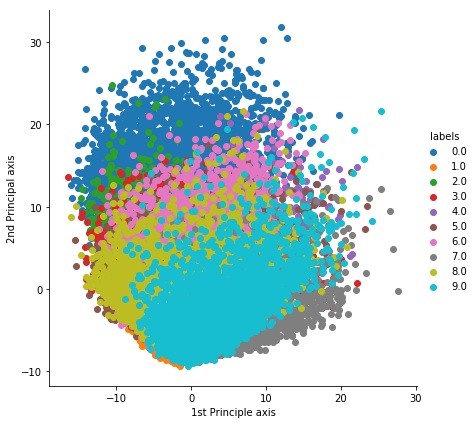

In [21]:
#we have reduced 784 dimension space to 2d using eigendecomposition
#plotting
sns.FacetGrid(dataframe,hue='labels',size=6)\
    .map(plt.scatter,"1st Principle axis","2nd Principal axis")\
    .add_legend()
plt.show()

# TSNE 


**using 10k points**

In [ ]:
data_1000=data_matrix[:10000]
label_1000=labels[:10000]
data_1000.shape

In [0]:
#TSNE
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0,perplexity=50,n_iter=6000)
trained_model=model.fit_transform(data_1000)
trained_model.shape

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


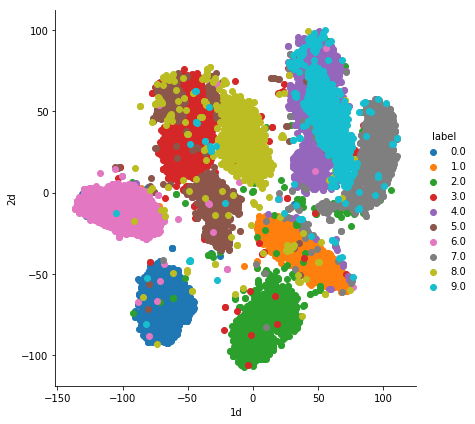

In [78]:
reduced_df=np.vstack((trained_model.T,label_1000)).T
#dataframe
df=pd.DataFrame(reduced_df,columns=['1d','2d','label'])
df.head()

sns.FacetGrid(df, hue='label', size=6).map(plt.scatter, '1d', '2d').add_legend()
plt.show()

***Using 5k points***

In [5]:
data_1000=data_matrix[:5000]
label_1000=labels[:5000]
data_1000.shape

(5000, 784)

In [6]:
#TSNE
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0,perplexity=40,n_iter=4000)
trained_model=model.fit_transform(data_1000)
trained_model.shape

(5000, 2)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


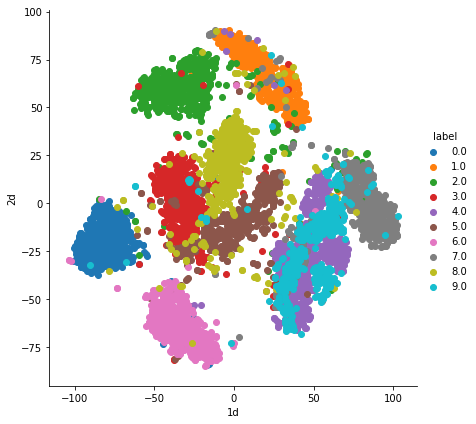

In [84]:
reduced_df=np.vstack((trained_model.T,label_1000)).T
#dataframe
df=pd.DataFrame(reduced_df,columns=['1d','2d','label'])
df.head()

sns.FacetGrid(df, hue='label', size=6).map(plt.scatter, '1d', '2d').add_legend()
plt.show()

# using 10k points (standardized)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


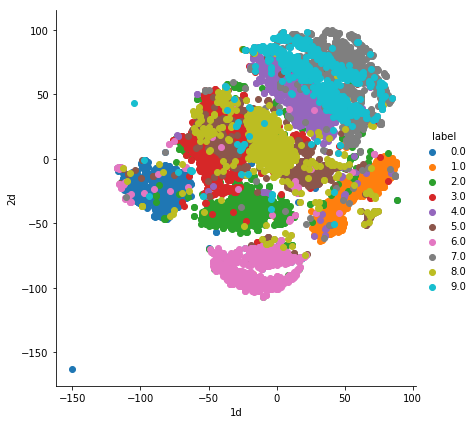

In [87]:
data_1000=data_matrix[:10000]
label_1000=labels[:10000]
data_1000.shape

#Data Preproceesing
from sklearn.preprocessing import StandardScaler
standard_data=StandardScaler().fit_transform(data_1000)
standard_data.shape


#TSNE
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0,perplexity=40,n_iter=4000)
trained_model=model.fit_transform(standard_data)
trained_model.shape
reduced_df=np.vstack((trained_model.T,label_1000)).T


#dataframe
df=pd.DataFrame(reduced_df,columns=['1d','2d','label'])
df.head()

sns.FacetGrid(df, hue='label', size=6).map(plt.scatter, '1d', '2d').add_legend()
plt.show()

# using 42k datapoints


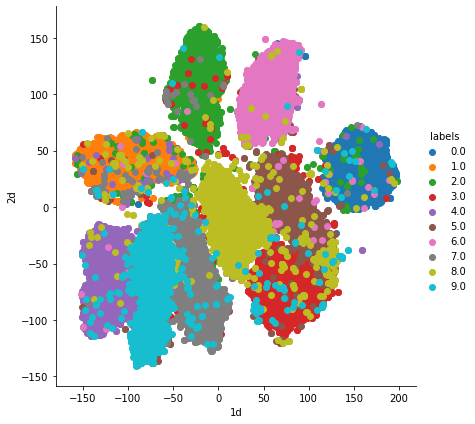

In [12]:
from sklearn.manifold import TSNE
#TSNE
model=TSNE(n_components=2,perplexity=45,random_state=None,n_iter=6000)
trained_model=model.fit_transform(data_matrix)
#vstack
stack=np.vstack((trained_model.T,labels)).T
df=pd.DataFrame(stack,columns=['1d','2d','labels'])
#plot
sns.FacetGrid(df,hue='labels',height=6).map(plt.scatter,'1d','2d').add_legend()
plt.show()